In [1]:
import math
import re as re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from bs4 import BeautifulSoup as bs
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

Average kill/death ratio of teams given:  1.0383985507246378


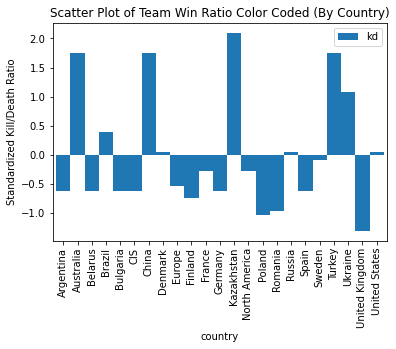

In [2]:
# Compute standardized Kill/Death ratio for every country using groupby clauses
teams = pd.read_csv('../data-collecter-js/teamData.csv')
g = teams.groupby("country")
kd = g.mean()['kd_ratio']
avg = kd.mean()
std = kd.std()
normalized_kd = []
for c in kd:
    normalized_kd.append((c-avg)/std)

ts = teams['country'].sort_values().unique()
temp = pd.DataFrame({'teams': ts, 'kd': normalized_kd})

print("Average kill/death ratio of teams given: ", avg)

# Create scatter plot of team win ratio (by country)
ax = temp.plot(kind='bar',x='teams',y='kd', title='Scatter Plot of Team Win Ratio Color Coded (By Country)', width = 1)
ax.set_xlabel('country')
ax.set_ylabel('Standardized Kill/Death Ratio')
plt.show()

team      year
Astralis  2016    0.623932
          2017    0.612150
          2018    0.779070
          2019    0.742138
          2020    0.654450
Name: outcome, dtype: float64


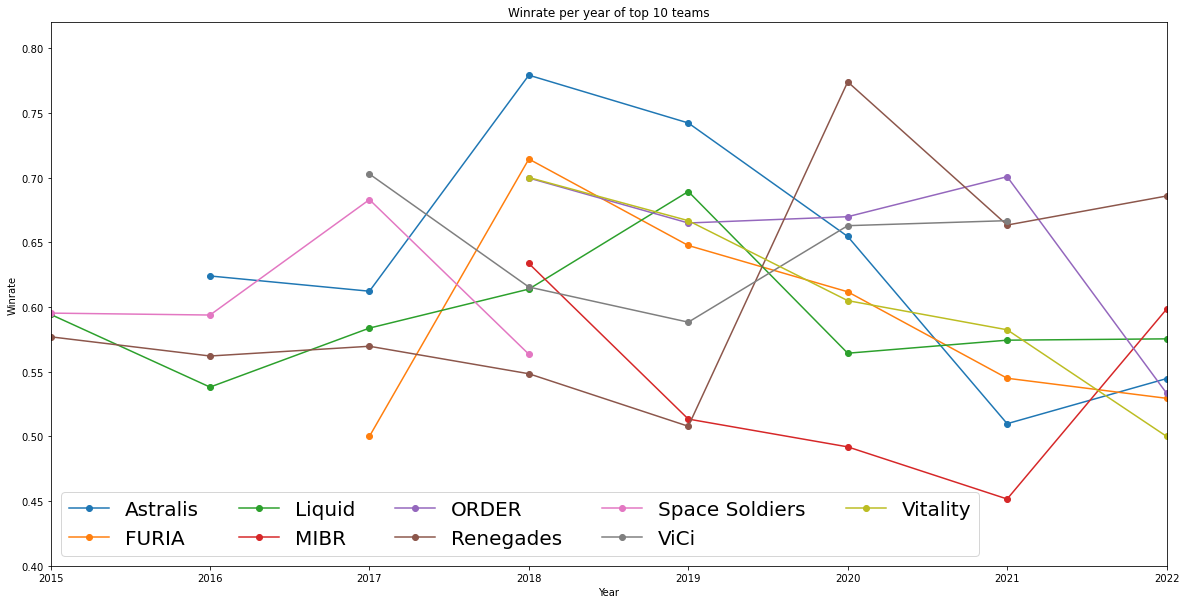

Astralis winrate in 2018 :  0.6239316239316239
Astralis winrate in 2019 :  0.6121495327102804
Astralis winrate in 2020 :  0.7790697674418605
Astralis winrate in 2021 :  0.7421383647798742
Astralis winrate in 2022 :  0.6544502617801047
FURIA winrate in 2018 :  0.5
FURIA winrate in 2019 :  0.7142857142857143
FURIA winrate in 2020 :  0.6474820143884892
FURIA winrate in 2021 :  0.6117021276595744
FURIA winrate in 2022 :  0.5449101796407185
Liquid winrate in 2018 :  0.5942622950819673
Liquid winrate in 2019 :  0.5380710659898477
Liquid winrate in 2020 :  0.5836575875486382
Liquid winrate in 2021 :  0.6137931034482759
Liquid winrate in 2022 :  0.6891891891891891
MIBR winrate in 2018 :  0.6335877862595419
MIBR winrate in 2019 :  0.5133689839572193
MIBR winrate in 2020 :  0.4918918918918919
MIBR winrate in 2021 :  0.45161290322580644
MIBR winrate in 2022 :  0.5982905982905983
ORDER winrate in 2018 :  0.6996047430830039
ORDER winrate in 2019 :  0.6648648648648648
ORDER winrate in 2020 :  0.6697

In [3]:
# Get Outcome groups for Team, Year
masterDF = pd.read_csv('../data-collecter-js/teamTopMatchData.csv')
chanz = masterDF.groupby(['team','year'])['outcome'].mean()
print(chanz.head())
cha = chanz.to_frame()
cha['o'] = chanz.index.get_level_values('team')
cha['f'] = chanz.index.get_level_values('year')

cha = cha.reset_index(drop=True)
cha = cha.rename(columns={'outcome': 'outcome', 'o': 'team', 'f': 'year'})

# Group by team and get unique
ts = cha.groupby('team')
names = ts['team'].unique()
flat_names = [item for sublist in names for item in sublist]

# Format plot
plt.figure(figsize=(20,10))
plt.xlim(2015,2022)
plt.ylim(.4, .82)
plt.title("Winrate per year of top 10 teams")
plt.ylabel('Winrate')
plt.xlabel('Year')

# Plot for each team
for k,v in ts:
    plt.plot(v['year'], v['outcome'],marker='o')
plt.legend(flat_names, ncol=5, prop={'size': 20})

# Show aformentioned plot
plt.show()

# Print out significant data about NiP

for nam in names:
    wrs = ts.get_group(nam[0])['outcome'].tolist()
    years = ['2018','2019','2020','2021','2022']
    for i in range(0,5):
        print(nam[0]+" winrate in", years[i], ": ", wrs[i])




Means of K/D Difference per team
 team
Astralis          2654.100000
FURIA             2282.000000
FaZe              2767.833333
Liquid            1638.545455
MIBR              1917.214286
ORDER             1871.700000
Renegades         1864.642857
Space Soldiers    2855.500000
ViCi              1963.333333
Vitality          2964.750000
Name: kd_difference, dtype: float64

Maxs of K/D Difference per team
 team
Astralis          7208.0
FURIA             3749.0
FaZe              5630.0
Liquid            4027.0
MIBR              5630.0
ORDER             3751.0
Renegades         3751.0
Space Soldiers    6256.0
ViCi              4260.0
Vitality          6164.0
Name: kd_difference, dtype: float64


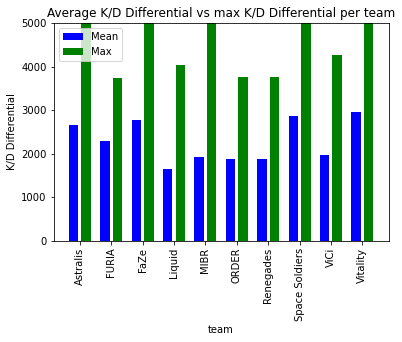

How much better each teams best player did versus average of players on the team
Astralis : 36.82 %
FURIA : 60.87 %
FaZe : 49.16 %
Liquid : 40.69 %
MIBR : 34.05 %
ORDER : 49.90 %
Renegades : 49.71 %
Space Soldiers : 45.64 %
ViCi : 46.09 %
Vitality : 48.10 %


In [4]:
means = []
maxs = []
players= pd.read_csv('../data-collecter-js/teamPlayerData.csv')
players = players.drop_duplicates()
teams = players['team'].sort_values().unique()
stuff = players.groupby('team')

# Get the means and maxes from the groups and format the columns
means = stuff.mean()
maxs = stuff.max()
means.columns = ['maps_played','rounds_played', 'kd_difference', 'kd_ratio', 'rating']
maxs.columns = ['name', 'maps_played', 'rounds_played','kd_difference', 'kd_ratio', 'rating']


# Print the data I got
print("Means of K/D Difference per team\n", means['kd_difference'])
print("\nMaxs of K/D Difference per team\n", maxs['kd_difference'])

# Plot the bar graph with means as blue and maxs as green
ax = plt.subplot(111)
ax.bar([.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8,8.8,9.8], means['kd_difference'], width=0.3,color='b',align='center')
ax.bar([1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2], maxs['kd_difference'],width=0.3,color='g',align='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10], teams, rotation='vertical')

# Graph formatting
ax.set_ylim([0, 5000])
ax.legend(['Mean', 'Max'])
plt.title("Average K/D Differential vs max K/D Differential per team")
plt.ylabel('K/D Differential')
plt.xlabel('team')

plt.show()


me = means['kd_difference'].tolist()
ma = maxs['kd_difference'].tolist()
print("How much better each teams best player did versus average of players on the team")
for i in range(len(me)):
    c = (me[i]/ma[i])*100
    print(teams[i], ": %.2f" %c, "%")

0       738285
1       738285
2       738284
3       738284
4       738276
         ...  
8940    735999
8941    735986
8942    735986
8943    735985
8944    735985
Name: date, Length: 8945, dtype: int64
Linear SVM 10 Point Cross Validation On Europe Data
[0.61894273 0.61894273 0.61894273 0.62114537 0.62114537 0.62114537
 0.44370861 0.62030905 0.62030905 0.62030905]


Linear SVM 10 Point Cross Validation On America Data
[0.625      0.67045455 0.67045455 0.66666667 0.66666667 0.67816092
 0.67816092 0.67816092 0.67816092 0.67816092]


Linear SVM 10 Point Cross Validation On Sweden Data
[0.52564103 0.52564103 0.6025641  0.47435897 0.47435897 0.46753247
 0.53246753 0.53246753 0.53246753 0.53246753]


Linear SVM Cross Mean and Standard Error For Europe Data
Accuracy: 0.60 (+/- 0.11)


Linear SVM Cross Mean and Standard Error For America Data
Accuracy: 0.67 (+/- 0.03)


Linear SVM Cross Mean and Standard Error For Sweden Data
Accuracy: 0.52 (+/- 0.08)


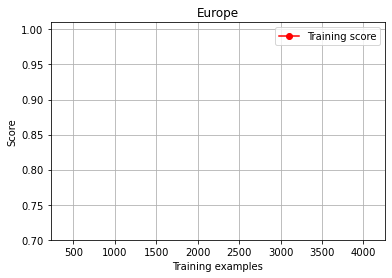

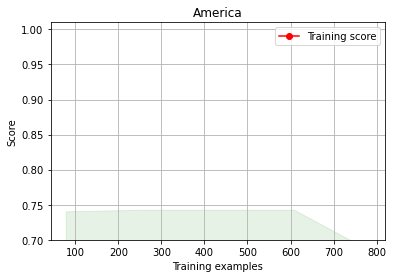

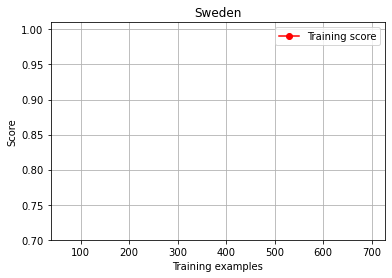

In [23]:
# Convert datetime data to ordinal format so it can be used in our machine learning classisfier
masterDF=pd.read_csv("../data-collecter-js/teamTopMatchData.csv")
# masterDF['date']= pd.to_datetime(masterDF['date']).apply(lambda  x:x.toordinal())
masterDF['date']=pd.to_datetime(masterDF['date'])
masterDF['date']=masterDF['date'].apply(pd.Timestamp.toordinal)

print(masterDF['date'])
# A function that plots a learning curve of a given machine learning classifier (provided by SKLearn documentation)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")

    plt.legend(loc="best")
    return plt

# Lump groups of countries together for machine learning purposes
europe = masterDF[(masterDF.team == 'Astralis') | (masterDF.team == 'North') | (masterDF.team == 'G2') | (masterDF.team == 'FaZe') | (masterDF.team=='Vitality') | (masterDF.team=='Space Soldiers') | (masterDF.team=='Liquid')]
america = masterDF[(masterDF.team == 'C9') | (masterDF.team == 'ORDER') | (masterDF.team == 'SK')]
sweden = masterDF[(masterDF.team == 'NiP') | (masterDF.team == 'MIBR')]

# Create SKlearn machine learning classifier
eursvc = svm.SVC()
amersvc = svm.SVC()
swedsvc = svm.SVC()

# Give the machine learning classifiers the training data
eursvc.fit(europe.date.values.reshape((len(europe),1)), europe.outcome)
amersvc.fit(america.date.values.reshape((len(america),1)), america.outcome)
swedsvc.fit(sweden.date.values.reshape((len(sweden),1)), sweden.outcome)

# Perform a cross validation analysis on each of the three country group classifiers
europesvm = cross_val_score(eursvc, europe.date.values.reshape((len(europe),1)), europe.outcome, cv=10)
americasvm = cross_val_score(amersvc, america.date.values.reshape((len(america),1)), america.outcome, cv=10)
swedensvm = cross_val_score(swedsvc, sweden.date.values.reshape((len(sweden),1)), sweden.outcome, cv=10)

# Perform a 10 point cross validation on Europe group
print ("Linear SVM 10 Point Cross Validation On Europe Data")
print(europesvm)
print ("\n")

# Perform a 10 point cross validation on America group
print ("Linear SVM 10 Point Cross Validation On America Data")
print(americasvm)
print ("\n")

# Perform a 10 point cross validation on Sweden group
print ("Linear SVM 10 Point Cross Validation On Sweden Data")
print(swedensvm)
print("\n")

# Cross mean and standard error stats for each country under SVM classifier
print ("Linear SVM Cross Mean and Standard Error For Europe Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (europesvm.mean(), europesvm.std() * 2))
print("\n")

print ("Linear SVM Cross Mean and Standard Error For America Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (americasvm.mean(), americasvm.std() * 2))
print("\n")

print ("Linear SVM Cross Mean and Standard Error For Sweden Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (swedensvm.mean(), swedensvm.std() * 2))

# Plot the learning curves for each of the three country groups
plot_learning_curve(eursvc, "Europe", europe.date.values.reshape((len(europe),1)), europe.outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)
plot_learning_curve(amersvc, "America", america.date.values.reshape((len(america),1)), america.outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)
plot_learning_curve(swedsvc, "Sweden", sweden.date.values.reshape((len(sweden),1)), sweden.outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)

# Show the learning curves
plt.show()

250
Predicted Outcome of Next 250 Games By Best European Teams (Astralis, North, G2, and FaZe)


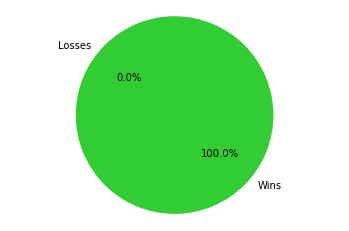

Predicted Outcome of Next 250 Games By Best American Teams (C9, Liquid, and SK)


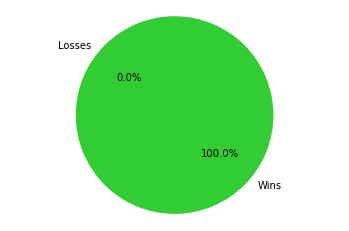

Predicted Outcome of Next 250 Games By Best Swedish Teams (NiP and fnatic)


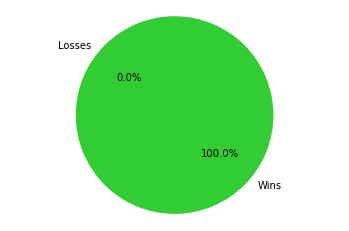

In [24]:
# Initialize win count variables for each predicition
ewincount = 0
awincount = 0
swincount = 0

# Calculate the each country group amount of wins for the next 250 games
for x in range(735621, 735871):
    if eursvc.predict([[x]]) == [1] :
        ewincount += 1

for x in range(735621, 735871):
    if amersvc.predict([[x]]) == [1] :
        awincount += 1
print (awincount)

for x in range(735621, 735871):
    if swedsvc.predict([[x]]) == [1] :
        swincount += 1

# Output Europe group predicition results
print("Predicted Outcome of Next 250 Games By Best European Teams (Astralis, North, G2, and FaZe)")
plt.pie([ewincount, 250-ewincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

# Output America group predicition results
print("Predicted Outcome of Next 250 Games By Best American Teams (C9, Liquid, and SK)")
plt.pie([awincount, 250-awincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

# Output Sweden group predicition results
print("Predicted Outcome of Next 250 Games By Best Swedish Teams (NiP and fnatic)")
plt.pie([swincount, 250-swincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()